In [ ]:
import h5py

file_path = "/home/ellab/air_pollution/src/data/full_data/2005/omi_no2_2005001.he5" # path to one file in 2005
data = h5py.File(file_path, 'r') # reads file
new = data["/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2TropCloudScreened"]
print(data["/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields"])

In [28]:
# import h5py
from pyhdf.SD import SD, SDC
file_path = "/home/ellab/air_pollution/src/data/new_aod/2005/maiac_aod_20050101.hdf" # path to one file in 2005
# data = h5py.File(file_path, 'r') # reads file

# # new = data["/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2TropCloudScreened"]
# # print(data["/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields"])
# # Source - https://stackoverflow.com/questions/40208420/how-to-find-hdf5-file-groups-keys-within-python
# # Posted by weatherfrog
# # Retrieved 11/4/2025, License - CC-BY-SA 4.0

# import h5py

# with h5py.File("/home/ellab/air_pollution/src/data/new_aod/2005/maiac_aod_20050101.hdf") as f:
#     print(f.keys())  # works like a dict

sd = SD(file_path, SDC.READ)
sds = sd.select('fakeDim3')  # if error, run list_hdf4_datasets(file_path) to see true names
print(sds)
data = sds[:].astype(float)

# --- Attributes ---
# attrs = sds.attributes()
# fill_value = attrs.get('_FillValue', -28672.0)
# scale_factor = attrs.get('scale_factor', 1.0)

# atts = sd.attributes()
# print(atts.get('AOD_055'))
# print(attrs)



HDF4Error: select: non-existent dataset

Compacted AOD reconstruction:

In [ ]:
# test to get lat, lon, and aod from 12/23/2005 global, original hdf aod file

############### 1 #################
from pyhdf.SD import SD, SDC

file_path = "/home/ellab/air_pollution/src/data/new_aod/2005/maiac_aod_20051223.hdf"

# Open the file in read mode
hdf = SD(file_path, SDC.READ)

# List datasets to confirm names
datasets = hdf.datasets()

for name, info in datasets.items():
    print(name, info)



AOD_055 (('YDim:CMGgrid', 'XDim:CMGgrid'), (3600, 7200), 22, 0)
Sigma_AOD_055 (('YDim:CMGgrid', 'XDim:CMGgrid'), (3600, 7200), 22, 1)
AOD_047 (('YDim:CMGgrid', 'XDim:CMGgrid'), (3600, 7200), 22, 2)
ColumnWatervapor_Terra (('YDim:CMGgrid', 'XDim:CMGgrid'), (3600, 7200), 22, 3)
ColumnWatervapor_Aqua (('YDim:CMGgrid', 'XDim:CMGgrid'), (3600, 7200), 22, 4)
CloudFraction (('YDim:CMGgrid', 'XDim:CMGgrid'), (3600, 7200), 22, 5)
Compact_AOD_055 (('fakeDim2', 'fakeDim3'), (1, 5226324), 22, 6)
OverpassTime (('fakeDim4', 'fakeDim5'), (1, 5226324), 22, 7)
Line (('fakeDim6', 'fakeDim7'), (1, 3522992), 22, 8)
Sample (('fakeDim8', 'fakeDim9'), (1, 3522992), 22, 9)
Offset_AOD_055 (('fakeDim10', 'fakeDim11'), (1, 3522992), 25, 10)
nAOD (('fakeDim12', 'fakeDim13'), (1, 3522992), 22, 11)


In [40]:
##################### 2 #######################
import numpy as np
from pyhdf.SD import SD, SDC

file_path = "/home/ellab/air_pollution/src/data/new_aod/2005/maiac_aod_20051223.hdf"

# Open HDF4 file
hdf = SD(file_path, SDC.READ)

# Read the required 1-D arrays
compact_aod = hdf.select('Compact_AOD_055')[:].astype(np.float32)
line_arr     = hdf.select('Line')[:].astype(np.int32)
sample_arr   = hdf.select('Sample')[:].astype(np.int32)
offset_arr   = hdf.select('Offset_AOD_055')[:].astype(np.int64)
nAOD_arr     = hdf.select('nAOD')[:].astype(np.int32)
time_arr     = hdf.select('OverpassTime')[:].astype(np.int32)

# Dimensions for 0.05° CMG grid
nlines  = 3600   # Line index: 0 .. 3599 -> latitude 90 - line*0.05
nsamples = 7200  # Sample index: 0 .. 7199 -> longitude -180 + sample*0.05

# Initialize AOD and time images
AODImg  = np.full((nlines, nsamples), np.nan, dtype=np.float32)
TimeImg = np.full((nlines, nsamples), -9999, dtype=np.int32)

# Choose which overpass index to reconstruct (0 = first, 1 = second, etc.)
orbit_index = 0

import numpy as np
from pyhdf.SD import SD, SDC

file_path = "/home/ellab/air_pollution/src/data/new_aod/2005/maiac_aod_20051223.hdf"

# --- Open the HDF4 file ---
hdf = SD(file_path, SDC.READ)

# --- Read datasets and use [0] to go from (1, N) -> (N,) where needed ---
# compact AOD and time: (1, 5226324) -> (5226324,)
compact_aod = hdf.select('Compact_AOD_055')[:].astype(np.float32)[0]
time_arr    = hdf.select('OverpassTime')[:].astype(np.int32)[0]

# line/sample/offset/nAOD: (1, 3522992) -> (3522992,)
line_arr    = hdf.select('Line')[:].astype(np.int32)[0]
sample_arr  = hdf.select('Sample')[:].astype(np.int32)[0]
offset_arr  = hdf.select('Offset_AOD_055')[:].astype(np.int64)[0]
nAOD_arr    = hdf.select('nAOD')[:].astype(np.int32)[0]

print("compact_aod shape:", compact_aod.shape)
print("time_arr shape:   ", time_arr.shape)
print("line_arr shape:   ", line_arr.shape)
print("sample_arr shape: ", sample_arr.shape)
print("offset_arr shape: ", offset_arr.shape)
print("nAOD_arr shape:   ", nAOD_arr.shape)

# --- Define global grid dimensions ---
nlines  = 3600    # 0..3599
nsamples = 7200   # 0..7199

# --- Initialize empty AOD and time images ---
AODImg  = np.full((nlines, nsamples), np.nan, dtype=np.float32)
TimeImg = np.full((nlines, nsamples), -9999, dtype=np.int32)

# --- Choose which overpass index to reconstruct (0 = first) ---
orbit_index = 0

# --- Number of grid cells with retrievals ---
ncells = line_arr.shape[0]

# --- Reconstruction loop ---
for i in range(ncells):
    line   = int(line_arr[i])
    sample = int(sample_arr[i])
    offset = int(offset_arr[i])
    nAOD   = int(nAOD_arr[i])

    # Skip invalid entries
    if nAOD <= 0 or orbit_index >= nAOD:
        continue

    idx = offset + orbit_index

    # Extra safety
    if idx < 0 or idx >= compact_aod.size:
        continue

    # Now these are TRUE scalars because compact_aod/time_arr are (N,), not (1, N)
    AODImg[line, sample]  = compact_aod[idx]
    TimeImg[line, sample] = time_arr[idx]


compact_aod shape: (5226324,)
time_arr shape:    (5226324,)
line_arr shape:    (3522992,)
sample_arr shape:  (3522992,)
offset_arr shape:  (3522992,)
nAOD_arr shape:    (3522992,)


In [ ]:
########## 2B-- sanity checks

print("AODImg shape:", AODImg.shape)
print("Num valid pixels:", np.isfinite(AODImg).sum())


AODImg shape: (3600, 7200)
Num valid pixels: 3522992


In [42]:
################ 2C-- sanity checks
print("line_arr shape:", line_arr.shape)
print("sample_arr shape:", sample_arr.shape)
print("offset_arr shape:", offset_arr.shape)
print("nAOD_arr shape:", nAOD_arr.shape)
print("Example line_arr[0]:", line_arr[0])
print("Example nAOD_arr[0]:", nAOD_arr[0])


line_arr shape: (3522992,)
sample_arr shape: (3522992,)
offset_arr shape: (3522992,)
nAOD_arr shape: (3522992,)
Example line_arr[0]: 600
Example nAOD_arr[0]: 1


In [45]:
############# 3: lat/lon extraction from lines and samples and reconstruction
# 1D indices
line_indices   = np.arange(nlines)   # 0..3599
sample_indices = np.arange(nsamples) # 0..7199

# 1D lat/lon coordinates
lat_1d = 90.0  - line_indices * 0.05
lon_1d = -180.0 + sample_indices * 0.05

# Full 2D grids matching AODImg shape: (3600, 7200)
LatGrid, LonGrid = np.meshgrid(lat_1d, lon_1d, indexing='ij')

print("LatGrid shape:", LatGrid.shape)
print("LonGrid shape:", LonGrid.shape)
# should both be (3600, 7200)



LatGrid shape: (3600, 7200)
LonGrid shape: (3600, 7200)


In [ ]:
######################## 4
# metadata from Panoply
fill_value  = -28672
valid_min   = 0
valid_max   = 6000
scale_factor = 0.001

# Start from your raw AODImg
AOD_raw = AODImg.copy()

# Mask invalid / fill values
invalid_mask = (
    (AOD_raw == fill_value) |
    (AOD_raw < valid_min) |
    (AOD_raw > valid_max)
)

AOD_raw[invalid_mask] = np.nan

# Apply scale factor
AOD_phys = AOD_raw * scale_factor

print("Example raw AOD:", AODImg[~np.isnan(AODImg)][:5])
print("Example physical AOD:", AOD_phys[~np.isnan(AOD_phys)][:5])


Example raw AOD: [71. 73. 57. 56. 63.]
Example physical AOD: [0.071      0.07300001 0.057      0.056      0.063     ]


In [61]:
# 1️⃣ Reconstruct AODImg & TimeImg
# (the big loop where you fill AODImg[line, sample] = compact_aod[idx])
# after this, AODImg is 2D (3600x7200) with np.nan where no data

# 2️⃣ Build LatGrid & LonGrid (same shape)
line_indices   = np.arange(3600)
sample_indices = np.arange(7200)
lat_1d = 90.0  - line_indices * 0.05
lon_1d = -180.0 + sample_indices * 0.05
LatGrid, LonGrid = np.meshgrid(lat_1d, lon_1d, indexing='ij')

# 3️⃣ ✅ Now this is where your section goes
valid_mask = ~np.isnan(AODImg)
aod_values = AODImg[valid_mask]      # 1D
lat_values = LatGrid[valid_mask]     # 1D
lon_values = LonGrid[valid_mask]     # 1D

# (Optional sanity check)
print(aod_values.shape, lat_values.shape, lon_values.shape)

# 4️⃣ Apply scale factor (from Panoply)
aod_phys_points = aod_values * 0.001

# 5️⃣ Filter to region
lat_max, lat_min = 43.150, 36.350
lon_min, lon_max = -83.150, -70.100
mask = (
    (lat_values >= lat_min) & (lat_values <= lat_max) &
    (lon_values >= lon_min) & (lon_values <= lon_max)
)
lat_sub = lat_values[mask]
lon_sub = lon_values[mask]
aod_sub = aod_phys_points[mask]

# 6️⃣ Save to NetCDF
import xarray as xr
ds_region = xr.Dataset(
    {
        "AOD_055": (("points",), aod_sub),
        "lat":     (("points",), lat_sub),
        "lon":     (("points",), lon_sub),
    }
)
ds_region.to_netcdf("AOD_region_points_20051223.nc")


(3522992,) (3522992,) (3522992,)


In [12]:
# test to get lat, lon, and aod from 12/23/2005 global, original hdf aod file

############### 1 #################
from pyhdf.SD import SD, SDC
import numpy as np
import xarray as xr

file_path = "/home/ellab/air_pollution/src/data/new_aod/2005/maiac_aod_20051223.hdf"

# Open the file in read mode
hdf = SD(file_path, SDC.READ)

##################### 2 #######################
# --- Read datasets and reshape ---
compact_aod = hdf.select('Compact_AOD_055')[:].astype(np.float32)[0]
time_arr    = hdf.select('OverpassTime')[:].astype(np.int32)[0]
line_arr    = hdf.select('Line')[:].astype(np.int32)[0]
sample_arr  = hdf.select('Sample')[:].astype(np.int32)[0]
offset_arr  = hdf.select('Offset_AOD_055')[:].astype(np.int64)[0]
nAOD_arr    = hdf.select('nAOD')[:].astype(np.int32)[0]

nlines  = 3600
nsamples = 7200
AODImg  = np.full((nlines, nsamples), np.nan, dtype=np.float32)

ncells = line_arr.shape[0]

# --- Reconstruction loop: average ALL nAOD records per cell ---
for i in range(ncells):
    line   = int(line_arr[i])
    sample = int(sample_arr[i])
    offset = int(offset_arr[i])
    nAOD   = int(nAOD_arr[i])

    # Skip cells without any retrievals
    if nAOD <= 0:
        continue

    # Make sure indices are in range
    if not (0 <= line < nlines and 0 <= sample < nsamples):
        continue

    start = offset
    end   = offset + nAOD

    if start < 0 or end > compact_aod.size:
        continue

    # Take the mean of all AOD records for this cell
    vals = compact_aod[start:end].astype(np.float64)
    if vals.size == 0:
        continue

    AODImg[line, sample] = np.mean(vals)

############# 3 #################
# lat/lon reconstruction
line_indices   = np.arange(nlines)
sample_indices = np.arange(nsamples)
lat_1d = 90.0  - line_indices * 0.05
lon_1d = -180.0 + sample_indices * 0.05
LatGrid, LonGrid = np.meshgrid(lat_1d, lon_1d, indexing='ij')

######################## 4 ######################
# Clean and scale the AOD (global grid)
fill_value   = -28672
valid_min    = 0
valid_max    = 6000
scale_factor = 0.001

AOD_raw = AODImg.copy()
invalid_mask = (
    (AOD_raw == fill_value) |
    (AOD_raw < valid_min) |
    (AOD_raw > valid_max)
)
AOD_raw[invalid_mask] = np.nan
AOD_phys = AOD_raw * scale_factor  # "nice" gridded AOD from compact

######################## 5 ######################
# Define region of interest
lat_max, lat_min = 43.150, 36.350
lon_min, lon_max = -83.150, -70.100

# --- 5a: gridded *regional* subset (for Panoply) ---
lat_mask_grid = (lat_1d >= lat_min) & (lat_1d <= lat_max)
lon_mask_grid = (lon_1d >= lon_min) & (lon_1d <= lon_max)

lat_reg = lat_1d[lat_mask_grid]
lon_reg = lon_1d[lon_mask_grid]
AOD_reg = AOD_phys[np.ix_(lat_mask_grid, lon_mask_grid)]  # 2D regional grid

# --- 5b: point-style regional subset ---
valid_mask = ~np.isnan(AODImg)
aod_values = AODImg[valid_mask]
lat_values = LatGrid[valid_mask]
lon_values = LonGrid[valid_mask]
aod_phys_points = aod_values * scale_factor

mask_region = (
    (lat_values >= lat_min) & (lat_values <= lat_max) &
    (lon_values >= lon_min) & (lon_values <= lon_max)
)
lat_sub = lat_values[mask_region]
lon_sub = lon_values[mask_region]
aod_sub = aod_phys_points[mask_region]

print("Regional gridded shape:", AOD_reg.shape)
print("Regional points:", lat_sub.shape)

######################## 6 ######################
# Save BOTH to NetCDF (regional only), with attributes

ds = xr.Dataset(
    {
        # gridded regional AOD (average of all overpasses)
        "AOD_055_compact_gridded": (("lat", "lon"), AOD_reg),

        # compact-based regional points
        "AOD_055_compact_points": (("points",), aod_sub),
        "lat_points": (("points",), lat_sub),
        "lon_points": (("points",), lon_sub),
    },
    coords={
        "lat": lat_reg,
        "lon": lon_reg,
    }
)

# ---- Add attributes for Panoply friendliness ----
ds["AOD_055_compact_gridded"].attrs.update({
    "long_name": "Daily-like AOD at 550 nm (compact MAIAC, mean over all overpasses, regional)",
    "units": "1",
    "description": (
        "AOD reconstructed from Compact_AOD_055 by averaging all nAOD records "
        "per CMG grid cell and scaling by 0.001, subset to specified region."
    ),
})

ds["AOD_055_compact_points"].attrs.update({
    "long_name": "AOD at 550 nm (compact MAIAC, regional points)",
    "units": "1",
    "description": (
        "Point sample of compact AOD within specified lat/lon bounds, "
        "averaged per grid cell and scaled by 0.001."
    ),
})

ds["lat"].attrs.update({
    "long_name": "latitude",
    "units": "degrees_north"
})
ds["lon"].attrs.update({
    "long_name": "longitude",
    "units": "degrees_east"
})
ds["lat_points"].attrs.update({
    "long_name": "latitude of points",
    "units": "degrees_north"
})
ds["lon_points"].attrs.update({
    "long_name": "longitude of points",
    "units": "degrees_east"
})

out_path = "AOD_cleaned_compact_region_20051223.nc"
ds.to_netcdf(out_path)
print("✅ Saved cleaned regional gridded + point data to", out_path)


Regional gridded shape: (136, 262)
Regional points: (17800,)
✅ Saved cleaned regional gridded + point data to AOD_cleaned_compact_region_20051223.nc


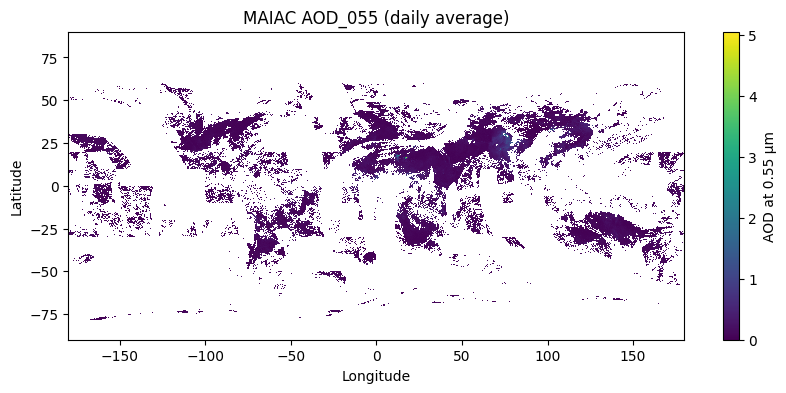

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from pyhdf.SD import SD, SDC

file_path = "/home/ellab/air_pollution/src/data/new_aod/2005/maiac_aod_20051223.hdf"
hdf = SD(file_path, SDC.READ)

# --- 1) Load gridded AOD_055 ---
aod_grid_raw = hdf.select("AOD_055")[:].astype(np.float32)  # shape (3600, 7200)

# From Panoply attributes:
fill_value   = -28672
valid_min    = 0
valid_max    = 6000
scale_factor = 0.001

# Mask invalid and scale
aod_grid = np.where(
    (aod_grid_raw == fill_value) |
    (aod_grid_raw < valid_min) |
    (aod_grid_raw > valid_max),
    np.nan,
    aod_grid_raw * scale_factor
)

# --- 2) Build 1D lat/lon axes for the 0.05° grid ---
nlines, nsamples = aod_grid.shape  # should be 3600, 7200
lat_1d = 90.0  - np.arange(nlines)    * 0.05   # 90 → -90
lon_1d = -180.0 + np.arange(nsamples) * 0.05   # -180 → 180

# --- 3) Quick global map ---
plt.figure(figsize=(10, 4))
plt.pcolormesh(lon_1d, lat_1d, aod_grid, shading="auto")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("MAIAC AOD_055 (daily average)")
plt.colorbar(label="AOD at 0.55 μm")
plt.gca().set_aspect("equal", adjustable="box")
plt.show()


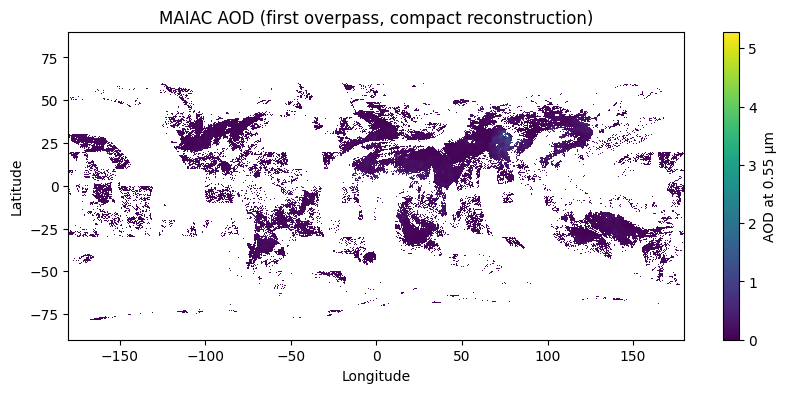

In [62]:
# --- Reconstructed AOD from compact format (first overpass) ---
# AODImg: shape (3600, 7200), with np.nan where no retrieval
import matplotlib.pyplot as plt

AOD_first_phys = AODImg * scale_factor  # 0.001

plt.figure(figsize=(10, 4))
plt.pcolormesh(lon_1d, lat_1d, AOD_first_phys, shading="auto")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("MAIAC AOD (first overpass, compact reconstruction)")
plt.colorbar(label="AOD at 0.55 μm")
plt.gca().set_aspect("equal", adjustable="box")
plt.show()


In [3]:
import xarray as xr
import matplotlib.pyplot as plt

# Load dataset (if not already in memory)
ds_region = xr.open_dataset("/home/ellab/air_pollution/src/AOD_region_points_20051223.nc")

# Quick sanity check
print(ds_region)

# Plot scatter of lon vs lat, colored by AOD
plt.figure(figsize=(6, 5))
sc = plt.scatter(
    ds_region["lon"],
    ds_region["lat"],
    c=ds_region["AOD_055"],
    s=4,
    cmap="plasma"
)
plt.colorbar(sc, label="AOD (550 nm)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("MAIAC AOD Regional Subset (2005-12-23)")
plt.gca().set_aspect("equal", adjustable="box")
plt.show()


ValueError: All ufuncs must have type `numpy.ufunc`. Received (<ufunc 'sph_legendre_p'>, <ufunc 'sph_legendre_p'>, <ufunc 'sph_legendre_p'>)

Num points: 17800
AOD range: 0.0020000000949949026 0.4790000319480896


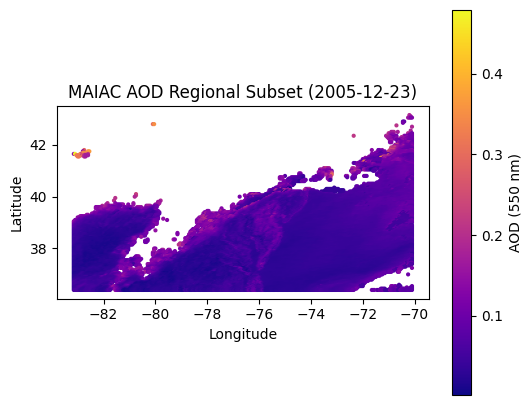

In [7]:
import xarray as xr
import matplotlib.pyplot as plt

# Open without printing
ds_region = xr.open_dataset("/home/ellab/air_pollution/src/AOD_region_points_20051223.nc")

# Pull out numpy arrays
lat = ds_region["lat"].values
lon = ds_region["lon"].values
aod = ds_region["AOD_055"].values

print("Num points:", lat.shape[0])
print("AOD range:", float(aod.min()), float(aod.max()))

plt.figure(figsize=(6, 5))
sc = plt.scatter(
    lon,
    lat,
    c=aod,
    s=4,
    cmap="plasma",
)
plt.colorbar(sc, label="AOD (550 nm)")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("MAIAC AOD Regional Subset (2005-12-23)")
plt.gca().set_aspect("equal", adjustable="box")
plt.show()


In [5]:
print("Dims:", ds_region.dims)
print("Data vars:", list(ds_region.data_vars))
print("Coords:", list(ds_region.coords))


Dims: FrozenMappingWarningOnValuesAccess({'points': 17800})
Data vars: ['AOD_055', 'lat', 'lon']
Coords: []


In [3]:
from pyhdf.SD import SD, SDC
import xarray as xr
import numpy as np

orig = SD("/home/ellab/air_pollution/src/data/new_aod/2005/maiac_aod_20050101.hdf", SDC.READ).select("AOD_055")[:].astype(float)
attrs = SD("/home/ellab/air_pollution/src/data/new_aod/2005/maiac_aod_20050101.hdf", SDC.READ).select("AOD_055").attributes()
fill = attrs.get("_FillValue", -28672.0)
scale = attrs.get("scale_factor", 0.001)
orig = np.where(orig == fill, np.nan, orig * scale)

clean = xr.open_dataset("/home/ellab/air_pollution/src/scripts/AOD_clean010105.nc")["AOD"].values

# Compare
same_shape = orig.shape == clean.shape
nan_match = np.isnan(orig).sum() == np.isnan(clean).sum()
max_diff = np.nanmax(np.abs(orig - clean))
print(same_shape, nan_match, max_diff)


ValueError: operands could not be broadcast together with shapes (3600,7200) (136,261) 

In [30]:
from pyhdf.SD import SD, SDC
import xarray as xr
import numpy as np

# --- paths ---
orig_path  = "/home/ellab/air_pollution/src/data/new_aod/2005/maiac_aod_20050101.hdf"
clean_path = "/home/ellab/air_pollution/src/scripts/AOD_clean010105.nc"

# --- 1) Load original global (HDF4), apply fill + scale ---
sd    = SD(orig_path, SDC.READ)
sds   = sd.select("AOD_055")
attrs = sds.attributes()
fill  = attrs.get("_FillValue", -28672.0)
scale = attrs.get("scale_factor", 1.0)
orig  = sds[:].astype(float)
sd.end()

orig = np.where(orig == fill, np.nan, orig * scale)

# --- 2) Load cleaned subset (NetCDF) ---
ds_clean = xr.open_dataset(clean_path)
clean    = ds_clean["AOD"].values
clat     = ds_clean["lat"].values   # 1D
clon     = ds_clean["lon"].values   # 1D

# --- 3) Map cleaned lat/lon to indices of the 0.05° global grid ---
res  = 0.05
lat0 = -90  + res/2   # -89.975
lon0 = -180 + res/2   # -179.975

# convert lat/lon values to index positions on the global grid
idx_lat = np.round((clat - lat0) / res).astype(int)
idx_lon = np.round((clon - lon0) / res).astype(int)

# safety: clip indices to valid range
idx_lat = np.clip(idx_lat, 0, orig.shape[0]-1)
idx_lon = np.clip(idx_lon, 0, orig.shape[1]-1)

# --- 4) Take the same subset from the global array ---
orig_sub = orig[np.ix_(idx_lat, idx_lon)]

# --- 5) Compare numbers ---
same_shape = orig_sub.shape == clean.shape
nan_match  = int(np.isnan(orig_sub).sum()) == int(np.isnan(clean).sum())
max_diff   = float(np.nanmax(np.abs(orig_sub - clean))) if same_shape else None
mean_diff  = float(np.nanmean(orig_sub - clean)) if same_shape else None

print("same_shape:", same_shape)
print("nan_match :", nan_match)
print("max_diff  :", max_diff)
print("mean_diff :", mean_diff)


FileNotFoundError: [Errno 2] No such file or directory: '/home/ellab/air_pollution/src/scripts/AOD_clean010105.nc'

/tmp/ipykernel_21300/2501159108.py:59: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


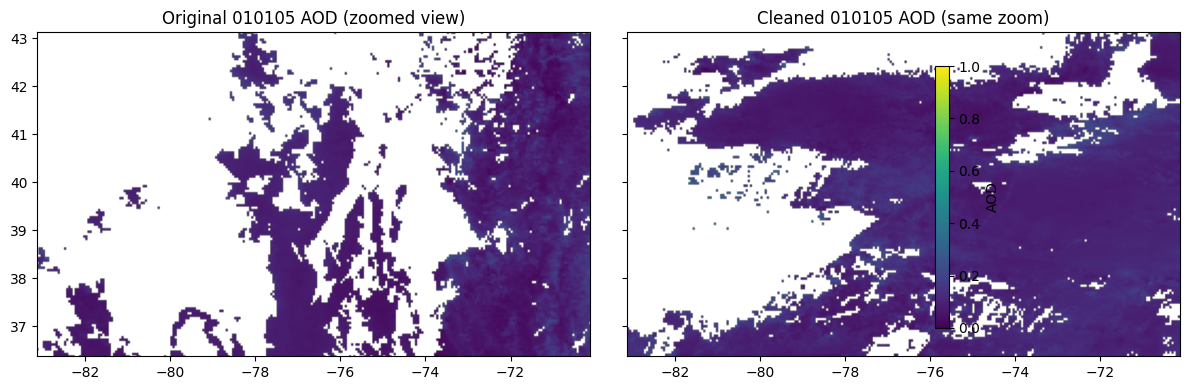

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from pyhdf.SD import SD, SDC

# --- paths ---
orig_path  = "/home/ellab/air_pollution/src/data/new_aod/2005/maiac_aod_20050101.hdf"
clean_path = "/home/ellab/air_pollution/src/data/clean_aod/2005/maiac_aod_20050101_clean.nc"

# --- load original (global CMG 0.05°) ---
sd    = SD(orig_path, SDC.READ)
sds   = sd.select("AOD_055")
attrs = sds.attributes()
fill  = attrs.get("_FillValue", -28672.0)
scale = attrs.get("scale_factor", 1.0)
orig  = sds[:].astype(float)
orig  = np.where(orig == fill, np.nan, orig * scale)
sd.end()

# global lat/lon centers (CMG 0.05°)
res = 0.05
n_lat, n_lon = orig.shape
lat = np.linspace(-90 + res/2,  90 - res/2,  n_lat)    # [-89.975 .. 89.975]
lon = np.linspace(-180 + res/2, 180 - res/2, n_lon)    # [-179.975 .. 179.975]

# --- load cleaned subset (already region) ---
clean_ds = xr.open_dataset(clean_path)
clean    = clean_ds["AOD"].values
clat     = clean_ds["lat"].values
clon     = clean_ds["lon"].values

# region to ZOOM to (use cleaned bounds so both show same window)
lat_min, lat_max = float(clat.min()), float(clat.max())
lon_min, lon_max = float(clon.min()), float(clon.max())

# --- plot: NO CROPPING of original; just set x/ylims = ZOOM ---
vmin, vmax = 0.0, 1.0  # same color scale for both

fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True)

im1 = axes[0].imshow(
    orig, origin="lower", vmin=vmin, vmax=vmax,
    extent=[lon[0], lon[-1], lat[0], lat[-1]], aspect="auto"
)
axes[0].set_title("Original 010105 AOD (zoomed view)")
axes[0].set_xlim(lon_min, lon_max)   # zoom window
axes[0].set_ylim(lat_min, lat_max)

im2 = axes[1].imshow(
    clean, origin="lower", vmin=vmin, vmax=vmax,
    extent=[clon[0], clon[-1], clat[0], clat[-1]], aspect="auto"
)
axes[1].set_title("Cleaned 010105 AOD (same zoom)")

# one shared colorbar with identical scale
cbar = fig.colorbar(im1, ax=axes, shrink=0.85)
cbar.set_label("AOD")

plt.tight_layout()
plt.show()


In [18]:
file_path = "/home/ellab/air_pollution/src/data/new_hcho/2005/omi_hcho_20050101.he5" # path to one file in 2005
data = h5py.File(file_path, 'r') # reads file
new = data["/HDFEOS/GRIDS/OMI Total Column Amount HCHO/Data Fields/ColumnAmountHCHO"]

# f = h5py.File(file_path)
# names = f['HDFEOS/GRIDS'].keys()
# names

new[0]

array([[-1.e+30, -1.e+30, -1.e+30, ..., -1.e+30, -1.e+30, -1.e+30],
       [-1.e+30, -1.e+30, -1.e+30, ..., -1.e+30, -1.e+30, -1.e+30],
       [-1.e+30, -1.e+30, -1.e+30, ..., -1.e+30, -1.e+30, -1.e+30],
       ...,
       [-1.e+30, -1.e+30, -1.e+30, ..., -1.e+30, -1.e+30, -1.e+30],
       [-1.e+30, -1.e+30, -1.e+30, ..., -1.e+30, -1.e+30, -1.e+30],
       [-1.e+30, -1.e+30, -1.e+30, ..., -1.e+30, -1.e+30, -1.e+30]],
      shape=(720, 1440), dtype=float32)

In [2]:
import h5py
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import netCDF4 as nc
import os

In [45]:
# vmin=1.9751113e+15, vmax=1.0216632e+16
def new_plot(data,lat,lon,date):

    mean = np.mean(data)
    max = np.nanmax(data)
    min = np.nanmin(data)


    # Define levels and colormap
    levels = np.linspace(0, 1, 21)
    cmap = plt.get_cmap('viridis', len(levels) - 1)

    plt.figure(figsize=(12, 8))
    ax = plt.axes(projection=ccrs.PlateCarree())

    img = ax.pcolormesh(lon, lat, data, transform=ccrs.PlateCarree(),
                        cmap=cmap, shading='auto',
                        #vmin=1.5e+15, vmax=1.00001+16) #for NO2
                        vmin = 272, vmax = 285) # for O3


    plt.colorbar(img, ax=ax, orientation='vertical', label='NO₂ (molec/cm²)')

    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS)
    ax.add_feature(cfeature.LAND, facecolor='lightgray')
    ax.set_extent([-81, -73, 38, 41], crs=ccrs.PlateCarree())
    ax.gridlines(draw_labels=True, linewidth=1, color='gray', alpha=0.5, linestyle='--')

    # Add mean, min, and max annotations
    plt.text(0.99, 0.04, f'Mean: {mean:.2e}', ha='right', va='bottom', transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.99, 0.12, f'Min: {min:.2e}', ha='right', va='bottom', transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(0.99, 0.20, f'Max: {max:.2e}', ha='right', va='bottom', transform=ax.transAxes, fontsize=10, bbox=dict(facecolor='white', alpha=0.5))


    plt.title(f'NO₂ (cloud-screened tropospheric column): {date}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()


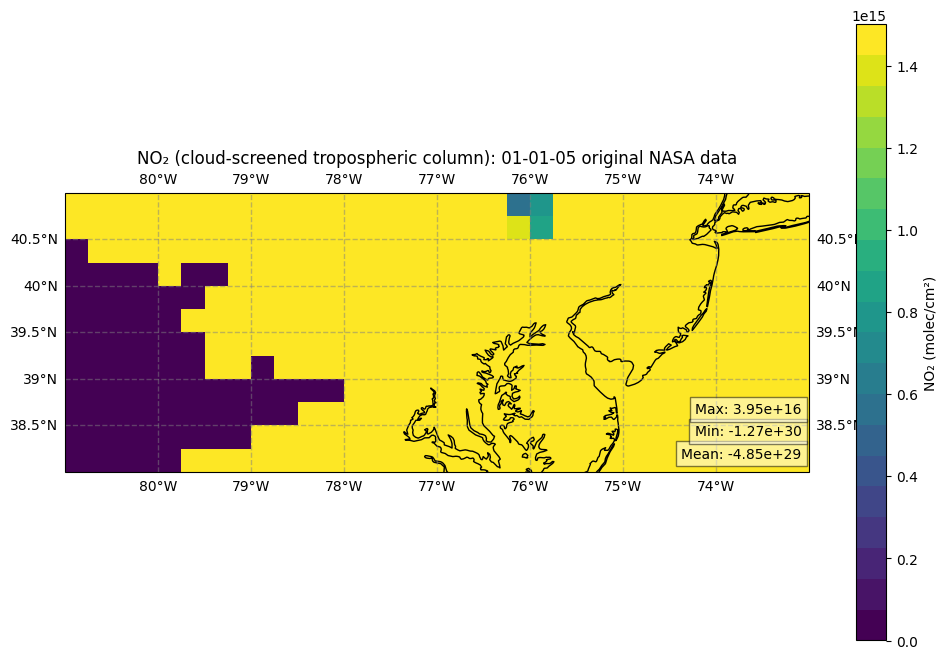

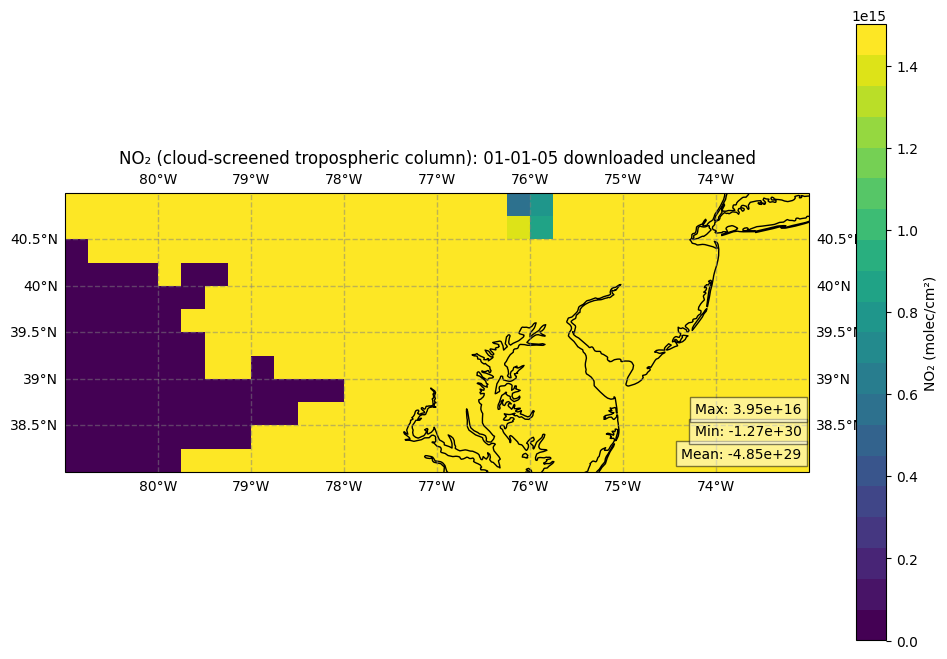

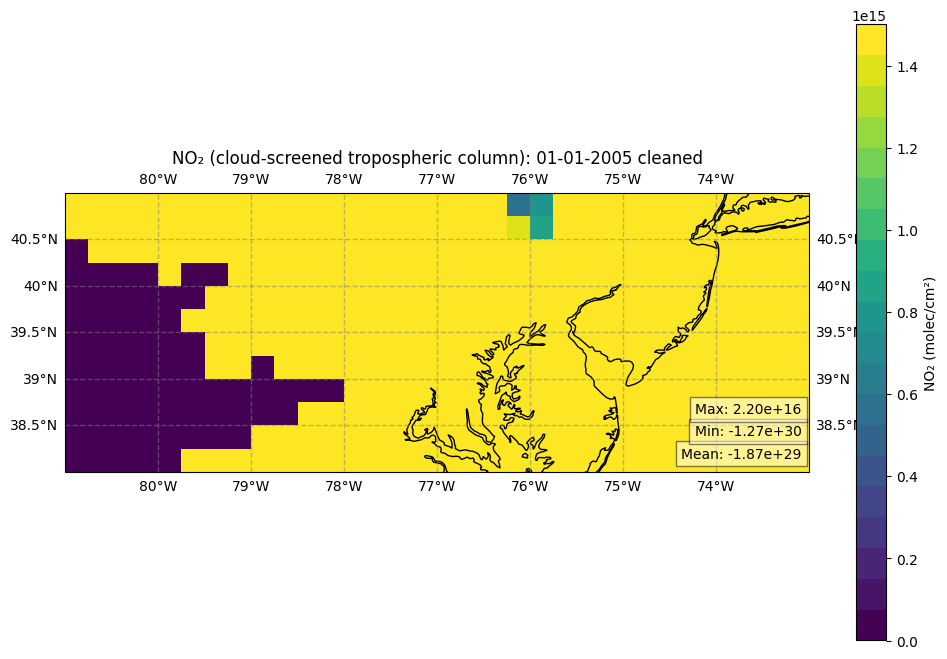

In [ ]:
# I need to check my data cleaning process, so I am plotting the following data to see if they look the same (which they should):
# 1. original data manually downloaded from NASA
# 2. downloaded data from download.sh script
# 3. cleaned data 

# plot original NASA NO2 data
# extract NO2 data from 01/01/2005
file_path = '/home/ellab/air_pollution/src/data/OMI-Aura_L3-OMNO2d_2005m0101_v003-2019m1120t182907 (3).he5'
data = h5py.File(file_path, 'r') # reads file
my_var = data["/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2TropCloudScreened"]

# below-- reconstruct lat/lon grid because I couldn't access the lat/lon in original file
n_lat, n_lon = my_var.shape 
lat_start = -90 + 0.25 / 2
lat_end = 90 - 0.25 / 2
lon_start = -180 + 0.25 / 2
lon_end = 180 - 0.25 / 2

latitudes = np.linspace(lat_start, lat_end, n_lat)
longitudes = np.linspace(lon_start, lon_end, n_lon)

lat = latitudes
lon = longitudes

new_plot(my_var, lat, lon, '01-01-05 original NASA data')

# ---------------------------------------------------------------------------------------------------------------------------------------------------------------- #


# plot data you downloaded using download.sh
file_path = '/home/ellab/air_pollution/src/data/new_no2/2005/omi_no2_20050101.he5'
data = h5py.File(file_path, 'r') # reads file
my_var = data["/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountNO2TropCloudScreened"]

new_plot(my_var, lat,lon,'01-01-05 downloaded uncleaned')

# ---------------------------------------------------------------------------------------------------------------------------------------------------------------- #

# plot cleaned data
file_path = "/home/ellab/air_pollution/src/data/new_no2/2005/omi_no2_20050101_clean.nc"
data = h5py.File(file_path, "r")

my_var = data["NO2"]
lat = data["lat"]
lon = data["lon"]

new_plot(my_var,lat,lon,"01-01-2005 cleaned")


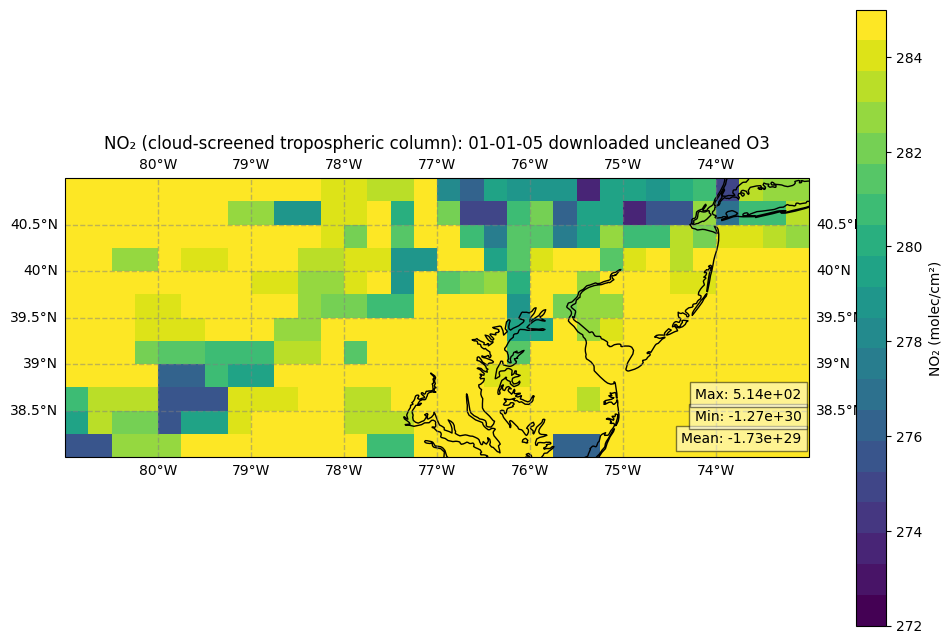

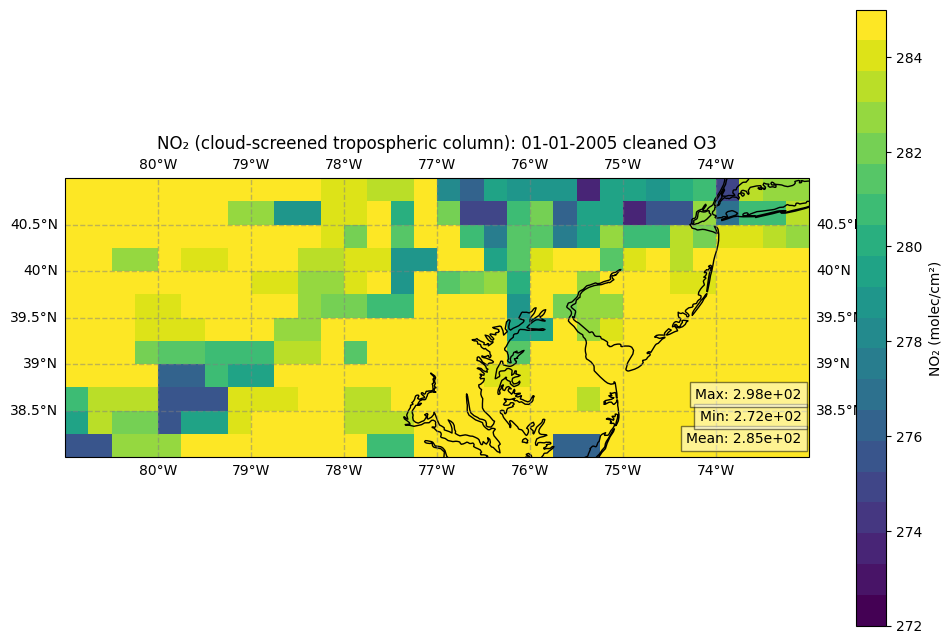

In [46]:
# checking O3 cleaned data

# plot data you downloaded using download.sh
file_path = '/home/ellab/air_pollution/src/data/new_o3/2005/omi_o3_20050101.he5'
data = h5py.File(file_path, 'r') # reads file
my_var = data["/HDFEOS/GRIDS/ColumnAmountO3/Data Fields/ColumnAmountO3"]


# below-- reconstruct lat/lon grid because I couldn't access the lat/lon in original file
n_lat, n_lon = my_var.shape 
lat_start = -90 + 0.25 / 2
lat_end = 90 - 0.25 / 2
lon_start = -180 + 0.25 / 2
lon_end = 180 - 0.25 / 2

latitudes = np.linspace(lat_start, lat_end, n_lat)
longitudes = np.linspace(lon_start, lon_end, n_lon)

lat = latitudes
lon = longitudes
new_plot(my_var, lat,lon,'01-01-05 downloaded uncleaned O3')

# ---------------------------------------------------------------------------------------------------------------------------------------------------------------- #


# plot original NASA O3 data
# file_path = ''
# data = h5py.File(file_path, 'r') # reads file
# my_var = data["/HDFEOS/GRIDS/ColumnAmountNO2/Data Fields/ColumnAmountO3"]

# new_plot(my_var, lat, lon, '01-01-05 original NASA data O3')

# ---------------------------------------------------------------------------------------------------------------------------------------------------------------- #

# plot cleaned data
file_path = "/home/ellab/air_pollution/src/data/new_o3/2005/omi_o3_20050101_clean.nc"
data = h5py.File(file_path, "r")

my_var = data["O3"]
lat = data["lat"]
lon = data["lon"]

new_plot(my_var,lat,lon,"01-01-2005 cleaned O3")
